In [1030]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [1031]:
# This function implements the OLS estimator which takes in 1D features, x, expected values y as inputs, and returns two parameters
def ols_estimator_1d(x, y):
    
    m = x.shape[0] # Number of training examples
    
    # Dependent variable (1D) - X matrix
    X = np.array([np.ones(m), x]) 
    X = X.T # Transpose matrix to hold a shape of m x 2 to facilitate matrix multiplication of its transpose with vector y of shape m x 1 


    # Independent variable - y vector
    Y = y[..., None]

    # Implementing OLS Estimator
    # 1D OLS parameters - [\beta_{0}, \beta_{1}], y-intercept and gradient respectively
    betas = np.linalg.inv(X.T @ X) @ X.T @ Y 

    betas = betas.flatten()
    
    return betas

# Q2: Create your synthetic datasets

In [1032]:
random.seed(10)
np.random.seed(10)


a = 2
b = -3

# Creates 10 datasets, with 100 data points each
m = 100 # Number of datasets
n = 10 # training examples 

mean = 0
var = 1

def generate_one_dataset(n, mean, var):
    # Create x and y data
    x = np.array([random.uniform(-1, 1) for i in range(n)])
    error = np.random.normal(loc=mean, scale= math.sqrt(var), size=(n,))
    y = np.array(list(map(lambda x_1, e: a*x_1 + b + e, x, error)))
    return [x, y]

def generate_m_datasets(m, n, mean, var):
    return [generate_one_dataset(n, mean, var) for i in range(m)]

datasets1 = generate_m_datasets(m, n, mean, var) 

print(f'Number of datasets: {len(datasets1)}')

Number of datasets: 100


# Q3: Run OLS on these 100 datasets

In [1033]:
# Run OLS Estimator on all 100 datasets

x = np.linspace(-60, 60, 5)

def plot_all_regressions(datasets, title, ax):
    lines = [] 
    all_betas = [] 

    # First plot: Show 100 lines for each parameter generated
    for d in datasets:
        betas = ols_estimator_1d(d[0], d[1])
        all_betas.append(betas)
        # Plot each linear regression function 
        lines += ax.plot(x, np.array(list(map(lambda x: betas[0] + betas[1]*x, x))), c='red') 

    # Plot the original plot with its coefficients    
    lines += ax.plot(x, np.array(list(map(lambda x: b + a*x, x))), c='black', label= "ground truth")

    ax.legend(lines[-2:], ['random datasets','ground truth'])
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # ax.set_xlim((-10, 10))
    ax.set_ylim((-60, 60))
    ax.set_aspect('equal', 'box')
    plt.tight_layout()
    
    plt.draw()
    return all_betas

    
def plot_all_parameters(datasets, title, ax):
    # Second plot to show each 100 parameter pair 
    all_betas = [] 

    # First plot: Show 100 lines for each parameter generated
    for d in datasets:
        betas = ols_estimator_1d(d[0], d[1])
        all_betas.append(betas)
    
    temp_betas = np.array(all_betas)
    temp_betas_t = temp_betas.T

    ax.set(xlim= (-60, 60), ylim=(-100, 100))
    ax.set_aspect('equal', 'box')
    ax.scatter(temp_betas_t[0], temp_betas_t[1], c='red', label='random datasets')
    
    # Plot the original parameters
    ax.scatter([b],[a], c='black', label='ground truth')
    ax.set_title(title)
    ax.set_xlabel('$\hat{b}$')
    ax.set_ylabel('$\hat{a}$')
    ax.legend()
    plt.tight_layout()

    plt.draw()
    
def show_and_compare_regressions(list_of_datasets, R, titles, figsize):
    fig, axs = plt.subplots(nrows=R , ncols=1, figsize= figsize)
    i = 0
    for ax in axs:
        plot_all_regressions(list_of_datasets[i], titles[i], ax)
        i+=1

def show_and_compare_parameters(list_of_datasets, R, titles, figsize):
    fig, axs = plt.subplots(nrows=R , ncols=1, figsize= figsize)
    i = 0
    for ax in axs:
        plot_all_parameters(list_of_datasets[i], titles[i], ax)
        i+=1

# Q4:  Change the dataset size n

In [1034]:
n = 100
datasets2 = generate_m_datasets(m, n, mean, var) 

In [1035]:
n = 2 
datasets3 = generate_m_datasets(m, n, mean, var) 

# Plot plots from Q3 to Q4

## Regressions computed from 3 sets of 100 random datasets, each with different training size

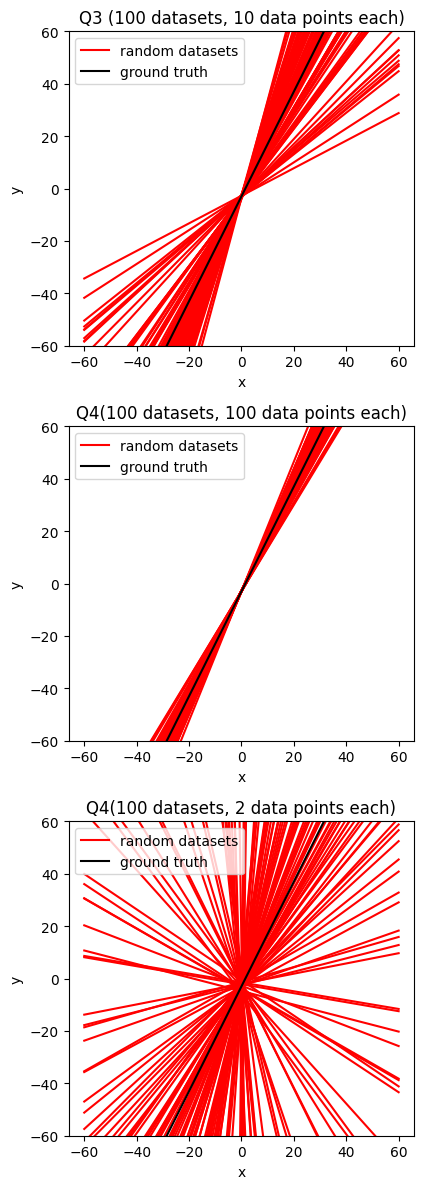

In [1036]:
show_and_compare_regressions([datasets1, datasets2, datasets3], 3, ['Q3 (100 datasets, 10 data points each)', 'Q4(100 datasets, 100 data points each)', 'Q4(100 datasets, 2 data points each)'], (12, 12))

## Predicted parameters computed from 3 sets of 100 random datasets, each with different training size

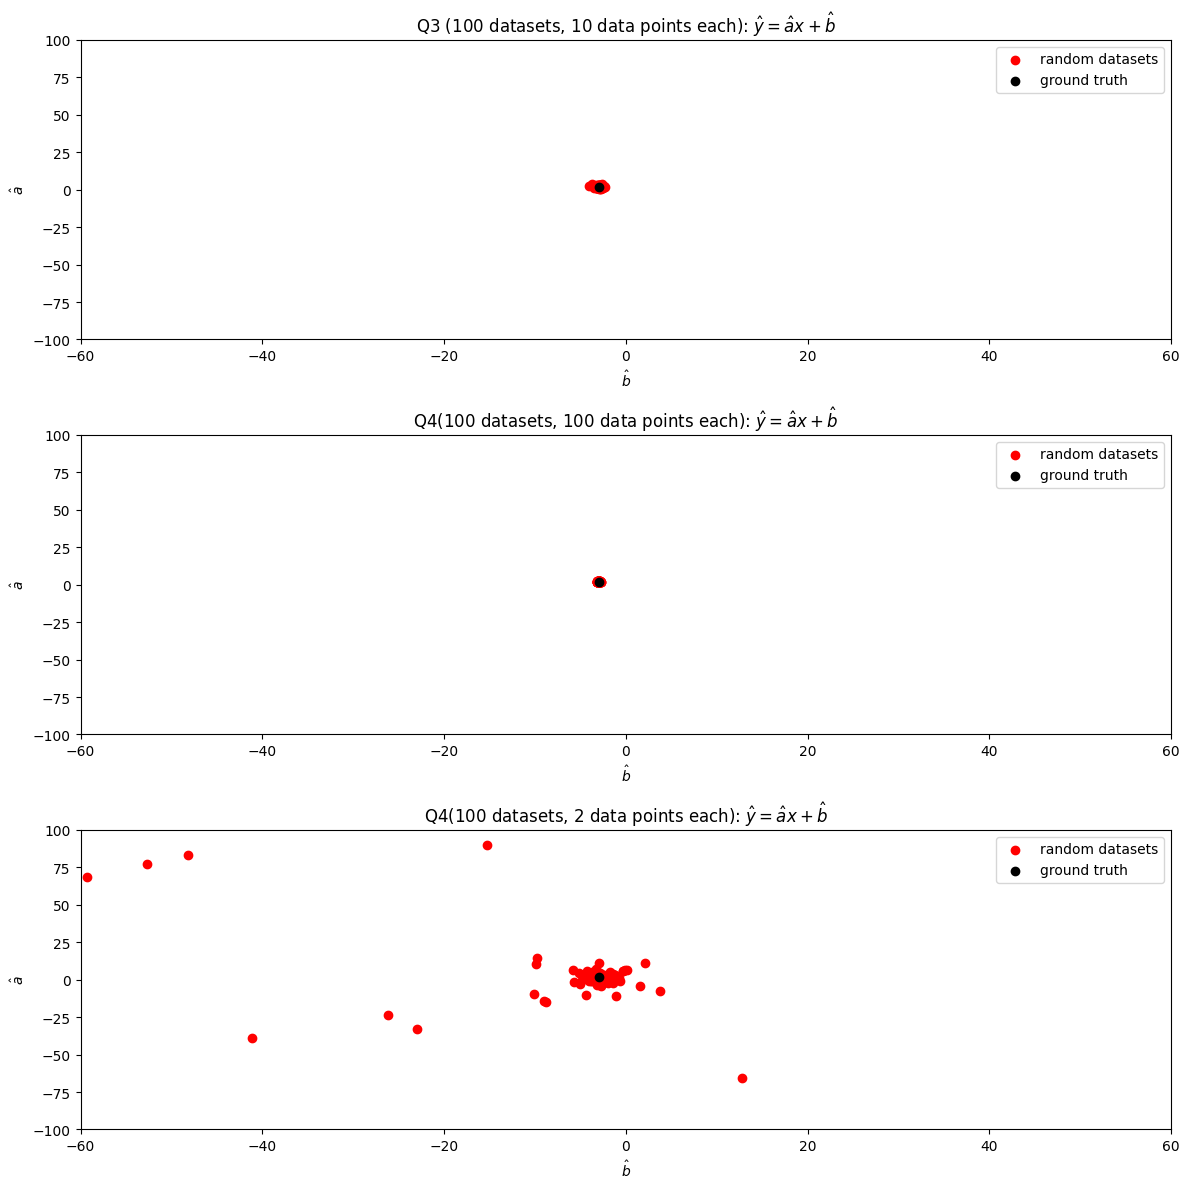

In [1037]:
show_and_compare_parameters([datasets1, datasets2, datasets3], 3, ['Q3 (100 datasets, 10 data points each): $\hat{y} = \hat{a}x + \hat{b}$', 'Q4(100 datasets, 100 data points each): $\hat{y} = \hat{a}x + \hat{b}$', 'Q4(100 datasets, 2 data points each): $\hat{y} = \hat{a}x + \hat{b}$'], (12, 12))

# Q5: Change the noise level

In [1038]:
n = 10

## Regressions computed with different variance

In [1039]:
var = 0.01
datasets4 = generate_m_datasets(m, n, mean, var) 

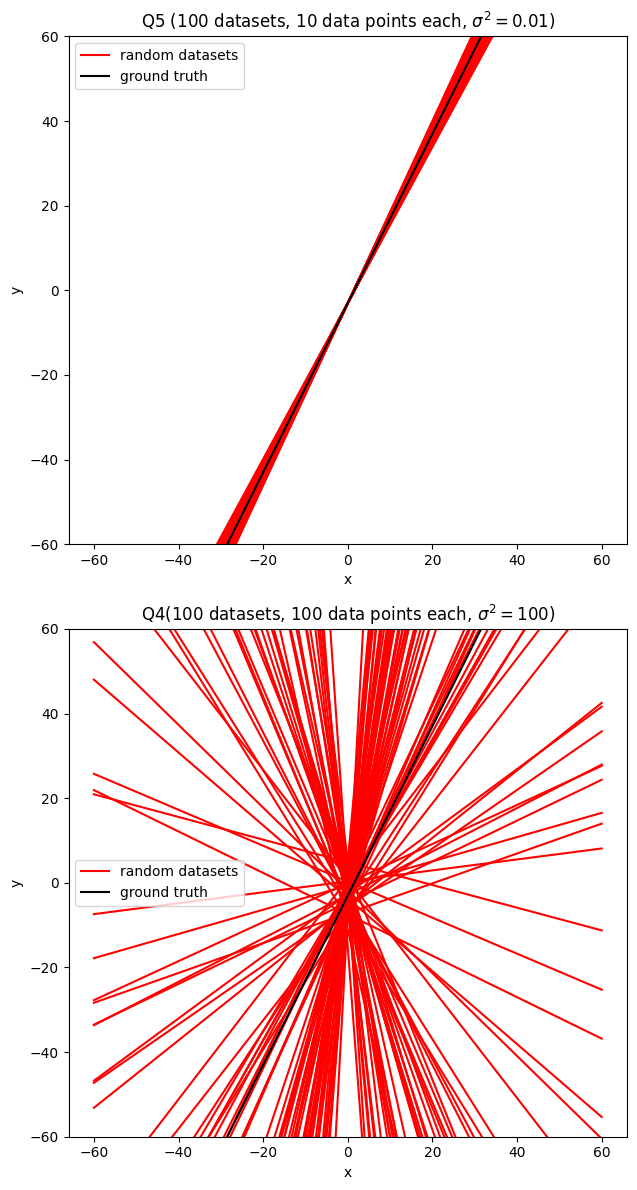

In [1040]:
show_and_compare_regressions([datasets4, datasets5], 2, ['Q5 (100 datasets, 10 data points each, $\sigma^{2} = 0.01$)', 'Q4(100 datasets, 100 data points each, $\sigma^{2} = 100$)'], (12, 12))

# Parameters with different variance

In [1041]:
var = 100 
datasets5 = generate_m_datasets(m, n, mean, var) 

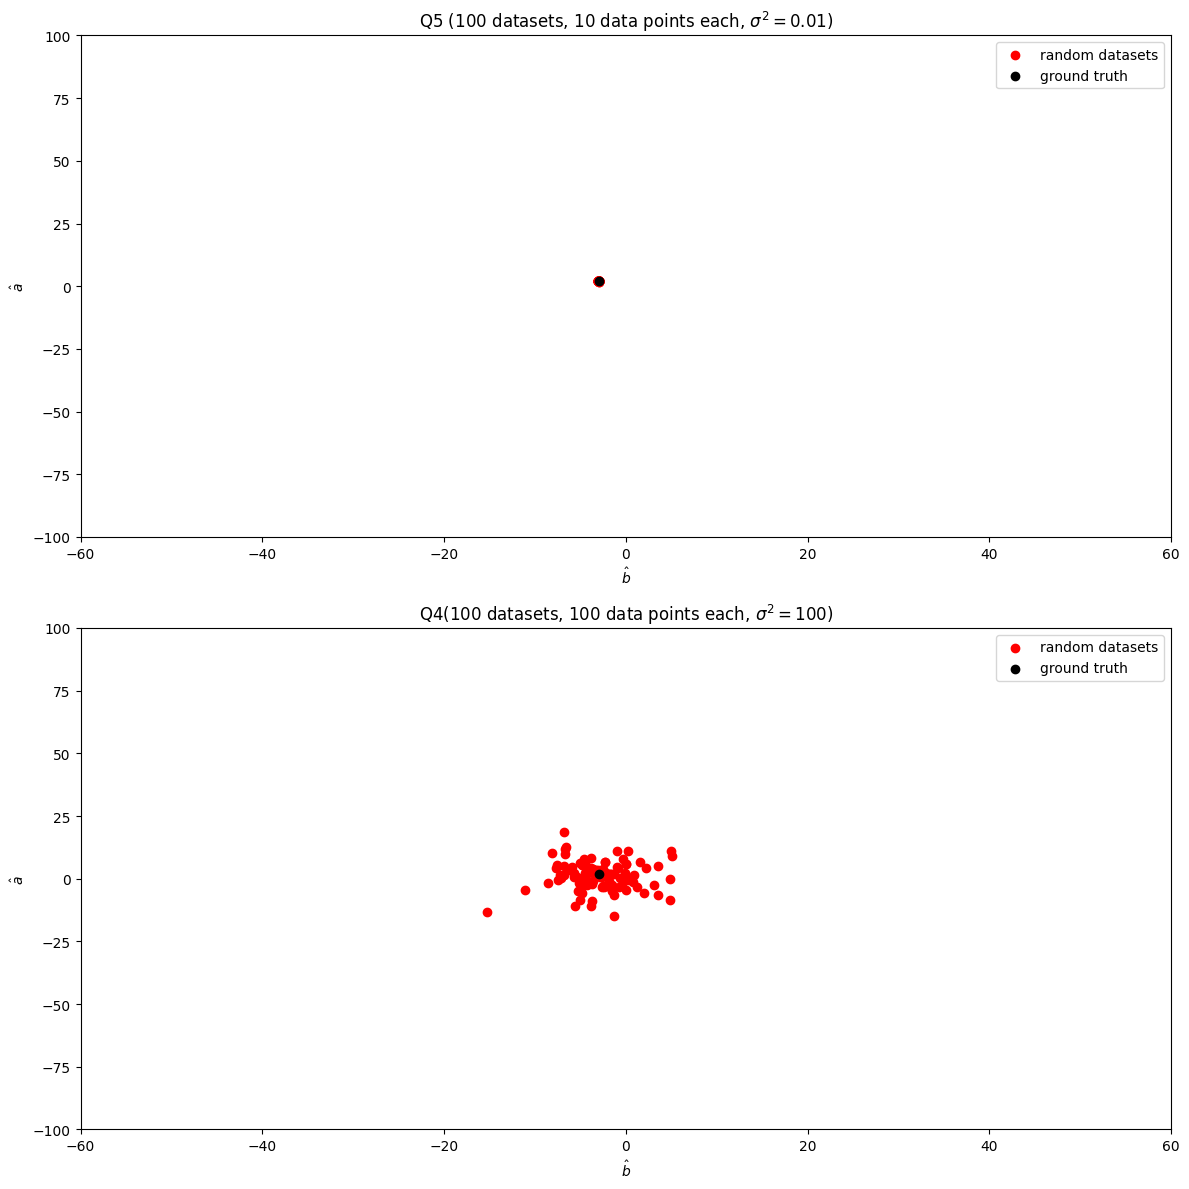

In [1042]:
show_and_compare_parameters([datasets4, datasets5], 2, ['Q5 (100 datasets, 10 data points each, $\sigma^{2} = 0.01$)', 'Q4(100 datasets, 100 data points each, $\sigma^{2} = 100$)'], (12, 12))